In [1]:
# Importing the libraries
from RBM import RBM
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [2]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

The number shown is the number: 2


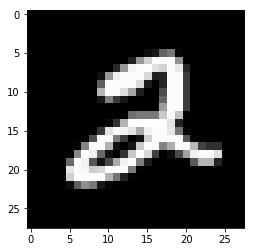

In [3]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [4]:
# If we train on the whole set we expect it to learn to detect edges.
train_loader = torch.utils.data.DataLoader(mnist_data,
                    batch_size=64, shuffle=True)

In [5]:
rbm_mnist = RBM(visible_units=28*28 , hidden_units=64 , use_gpu=False , learning_rate = 1e-5)

In [ ]:
epochs = 1000
batch_size = 64
rbm_mnist.train(train_loader , epochs , batch_size)

Average Epoch Error per iteration (epoch:0) : 951.2763
Average Epoch Error per iteration (epoch:1) : 868.3217
Average Epoch Error per iteration (epoch:2) : 768.3509
Average Epoch Error per iteration (epoch:3) : 711.0263
Average Epoch Error per iteration (epoch:4) : 682.1713
Average Epoch Error per iteration (epoch:5) : 666.3649
Average Epoch Error per iteration (epoch:6) : 657.0321


In [ ]:
# This shows the weights for each of the 64 hidden neurons and give an idea how each neuron is activated.
f , axarr = plt.subplots(8 , 8 , True, True)
f.set_figheight(15)
f.set_figwidth(15)
learned_weights = rbm_mnist.weight.transpose(0,1).numpy()
for i in range(8):    
    for j in range(8):
        w = learned_weights[8 * i + j,:].reshape(28,28)
        
        axarr[i,j].imshow(w , cmap= 'gray')        


# plt.tight_layout()
plt.show()